# Problemi ed algoritmi fondamentali dell'algebra lineare numerica
I quattro problemi che hanno motivato la creazione della libreria LAPACK, sono:
- soluzione di sistemi lineari
     \begin{equation}A x = b\end{equation}
- minimi quadrati lineari
     \begin{equation}x^* = \min_x ||\ A x - b\ ||^2_2\end{equation}
- approssimazione di autovalori $\lambda_i$ ed autovettori $v_i$
     \begin{equation}A v_i = \lambda_i v_i\end{equation}
- singular value decomposition (SVD)
     \begin{equation}U \Sigma V^T = A\end{equation}

Vediamo la soluzione di questi problemi utilizzando l'implementazione NumPy della LAPACK:

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

I **sistemi lineari** si risolvono mediante fattorizzazioni e successive
soluzioni di sistemi triangolari (che richiedono semplici sostituzioni, in avanti o all'indietro): 
se hanno matrice $A$ quadrata ed invertibile, con la fattorizzazione \begin{equation} LU=A \end{equation} e risolvendo i due sistemi triangolari \begin{equation} Ly=b \quad , \quad Ux=y \end{equation} si trova l'unica soluzione $x$ che soddisfa esattamente l'equazione \begin{equation}A x = b\end{equation}.
Invece, se sono sovradeterminati ed $A$ ha rango pieno per colonne, con la fattorizzazione di Cholesky \begin{equation}L^T L = A^T A\end{equation} e risolvendo i due sistemi triangolari \begin{equation} L^Ty= A^T b \quad , \quad Lx=y \end{equation} o la fattorizzazione \begin{equation}QR = A\end{equation} e risolvendo il sistema triangolare \begin{equation} Rx=Q^T b \end{equation} si trova la soluzione che soddisfa al criterio dei minimi quadrati.

norma-2 dell'errore relativo =  1.809590989573375e-14


dimensioni di A:  140  x  100
norma-2 dell'errore relativo con np.lstsq =  1.0314892064103325e-14
norma-2 dell'errore relativo con QR =  1.1163793509516425e-14
norma-2 dell'errore relativo con equazioni normali =  2.5444587381123693e-13


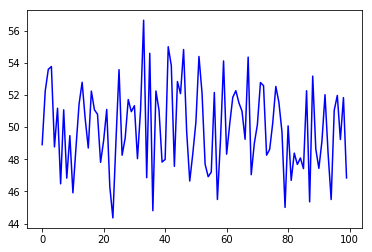

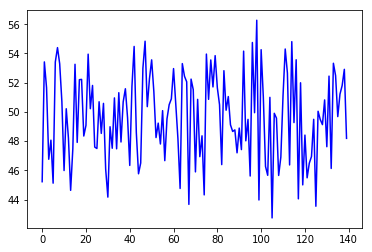

In [2]:
# sistema a matrice quadrata:
n = 100
A = np.random.rand(n,n)
x_vero = np.ones(n)
b = A @ x_vero
plt.figure(1); plt.plot(b,'b-')
x = np.linalg.solve(A, b)
print("norma-2 dell'errore relativo = ",np.linalg.norm(x - x_vero)/np.linalg.norm(x_vero)); print("\n")

# sistema sovra-determinato (numero di righe > numero di colonne):
m = n + 40
A = np.random.rand(m,n)
print("dimensioni di A: ",m," x ",n)
x_vero = np.ones(n)
b = A @ x_vero
plt.figure(2); plt.plot(b,'b-')
x = np.linalg.lstsq(A,b,rcond=None)[0]
print("norma-2 dell'errore relativo con np.lstsq = ",np.linalg.norm(x - x_vero)/np.linalg.norm(x_vero))
Q,R = np.linalg.qr(A.copy())
x1 = np.linalg.solve(R, Q.T @ b)
print("norma-2 dell'errore relativo con QR = ",np.linalg.norm(x1 - x_vero)/np.linalg.norm(x_vero))
x2 = np.linalg.solve(A.T @ A, A.T @ b)
print("norma-2 dell'errore relativo con equazioni normali = ",np.linalg.norm(x2 - x_vero)/np.linalg.norm(x_vero))
plt.show()

In [3]:
# fattorizzazione QR: stabilità del calcolo di Q come matrice ortogonale (householder); verifica dell'ortogonalità di Q
np.linalg.norm(Q.T @ Q - np.eye(n))

7.418178196290358e-15

La ricerca di **autovalori ed autovettori** si fa necessariamente mediante metodi iterativi che approssimano autospazi di una matrice, da cui si estraggono una base di autovettori ed un'approssimazione degli autovalori associati:

In [4]:
A = np.random.rand(6,6)
S,Q = scipy.linalg.schur(A.copy(),output='real')
print(np.linalg.norm(A - Q @ S @ Q.T))
print(S)
D,V = np.linalg.eig(A.copy())
print("autovalori = ",D); print("\n")


A = A.T @ A  # A è ora simmetrica, quindi ha autovalori reali e puo' essere diagonalizzata!
D,V = np.linalg.eig(A.copy())
print("||A * V[:,0] - D[0]*V[:,0]|| = ",np.linalg.norm(A @ V[:,0] - D[0]*V[:,0]))
print("||D - V.T * A * V|| = ",np.linalg.norm(np.diag(D) - V.T @ A @ V))

2.722594198546231e-15
[[ 2.92618212 -0.10726988 -0.02451747  0.44257928  0.19284414 -0.32379477]
 [ 0.         -0.64600612  0.39224306  0.06354866  0.08483867  0.01659665]
 [ 0.          0.         -0.0886793  -0.65319826 -0.07658734 -0.23065065]
 [ 0.          0.          0.16137096 -0.0886793   0.37059601  0.09359408]
 [ 0.          0.          0.          0.          0.71891491  0.0053527 ]
 [ 0.          0.          0.          0.          0.          0.3298911 ]]
autovalori =  [ 2.92618212+0.j        -0.64600612+0.j        -0.0886793 +0.3246648j
 -0.0886793 -0.3246648j  0.71891491+0.j         0.3298911 +0.j       ]


||A * V[:,0] - D[0]*V[:,0]|| =  3.922089704712238e-15
||D - V.T * A * V|| =  4.318222621452633e-15


In [5]:
# Singular Value Decomposition (SVD):
m = 30
n = 7
A = np.random.rand(m,n)
U,S,V = np.linalg.svd(A.copy()); V = V.T

# calcolo della norma-2 di una matrice:
print("||A|| = ",np.linalg.norm(A,2))
print("confronto con sigma_1 = ",S[0]); print("\n")

# calcolo del numero di condizionamento di una matrice:
print("cond(A) = ",np.linalg.cond(A,2))
print("confronto con sigma_1/sigma_n = ",S[0]/S[-1]); print("\n")

# ricostruisco A dalla sua "decomposizione diadica":
Add = np.zeros((m,n))
for i in range(n):
    Add += S[i] * np.atleast_2d(U[:,i]).T @ np.atleast_2d(V[:,i])
#endfor
print("||A - Add|| = ",np.linalg.norm(A - Add,2))

||A|| =  7.557358120260985
confronto con sigma_1 =  7.557358120260985


cond(A) =  7.176354990436382
confronto con sigma_1/sigma_n =  7.176354990436382


||A - Add|| =  7.778180931707733e-15


In [6]:
# l'effetto del malcondizionamento della matrice:
# costruisco una matrice random malcondizionata dalla sua SVD:
n = 40
U,dummy = np.linalg.qr(np.random.rand(n,n))
V,dummy = np.linalg.qr(np.random.rand(n,n))
S = 2.**np.arange(0,-n,-1)
A = U @ np.diag(S) @ V.T
print("numero di condizionamento di A = ",np.linalg.cond(A)); print("\n")

# e quindi i metodi con la QR e con le equazioni normali non sono più equivalenti:
x_vero = np.ones(n)
b = A @ x_vero
Q,R = np.linalg.qr(A.copy())
x1 = np.linalg.solve(R, Q.T @ b)
print("norma-2 dell'errore relativo con QR = ",np.linalg.norm(x1 - x_vero)/np.linalg.norm(x_vero))
x2 = np.linalg.solve(A.T @ A, A.T @ b)
print("norma-2 dell'errore relativo con equazioni normali = ",np.linalg.norm(x2 - x_vero)/np.linalg.norm(x_vero))

numero di condizionamento di A =  549748490581.08386


norma-2 dell'errore relativo con QR =  1.5723132417598257e-05
norma-2 dell'errore relativo con equazioni normali =  46.41953225707894
